# Python and R

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [5]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
4916,63907,117651,1311,2009,2009_Gov-G_NJ,NJ,Gov-G,Gov-G,Zogby Interactive/JZ Analytics,395,Online,NaN,10/28/09,1093.0,Jon Stevens Corzine,13756,DEM,40.0,Chris Christie,13757,REP,39.0,14.0,1.0,11/3/09,44.88,48.46,-3.58,4.58,0.0,NaN
6710,30775,37119,675,2012,2012_Pres-G_MI,MI,Pres-G,Pres-G,Angus Reid Global,13,Online,NaN,11/2/12,502.0,Barack Obama,16,DEM,52.0,Mitt Romney,9,REP,47.0,NaN,5.0,11/6/12,54.21,44.71,9.50,-4.50,1.0,NaN
5272,32899,39495,1513,2010,2010_Sen-GS_DE,DE,Sen-G,Sen-GS,TCJ Research,327,IVR,NaN,10/20/10,1000.0,Christopher A. Coons,4467,DEM,51.0,Christine O'Donnell,4493,REP,44.0,NaN,7.0,11/2/10,56.61,40.03,16.58,-9.58,1.0,NaN
9567,63297,115877,7694,2020,2020_Pres-D_IA,IA,Pres-P,Pres-D,Neighborhood Research and Media,227,Live Phone,NaN,1/16/20,300.0,Bernard Sanders,13257,DEM,10.3,Pete Buttigieg,13345,DEM,17.0,14.7,-6.7,2/3/20,24.71,21.31,3.41,NaN,0.0,NaN
1445,54649,88185,1388,2002,2002_Gov-G_FL,FL,Gov-G,Gov-G,The Florida Poll,99,Live Phone,NaN,10/29/02,715.0,Bill McBride,12845,DEM,43.0,Jeb Bush,12847,REP,49.0,NaN,-6.0,11/5/02,43.16,56.01,-12.85,6.85,1.0,NaN


The cell below loads the same data in R:

In [6]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [7]:
df.sample()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
6897,64191,118101,1782,2013,2013_House-GS_SC-1,SC-1,House-G,House-GS,Public Policy Polling,263,IVR,NaN,4/20/13,796.0,Elizabeth Colbert Busch,14157,DEM,50.0,Mark Sanford,14158,REP,41.0,3.0,9.0,5/7/13,45.23,54.03,-8.8,17.8,0.0,NaN


In [97]:
df_seina = df[df['pollster'] == 'Siena College/The New York Times Upshot']


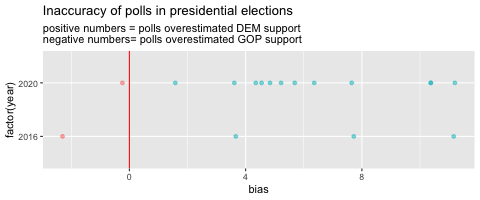

In [98]:
%%R -h 200

df_siena <- df %>% 
    filter(pollster == 'Siena College/The New York Times Upshot') %>%
    filter(type_detail=='Pres-G')

ggplot(df_siena) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

👉 **Jayhawk Consulting**

In [99]:
# filter the dataframe to pollster from Jayhawk Consulting

df_jay = df[df['pollster'] == 'Jayhawk Consulting Services']


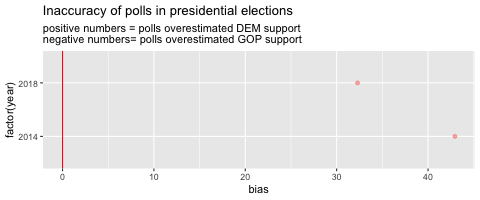

In [100]:
%%R -h 200

df_jay <- df %>% 
    filter(pollster == 'Jayhawk Consulting Services')

ggplot(df_jay) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [101]:
df_fox = df[df['pollster'] == 'Fox News/Beacon Research/Shaw & Co. Research']


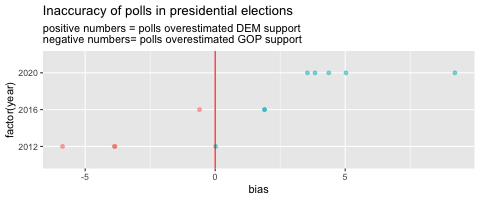

In [102]:
%%R -h 200

df_fox <- df %>% 
    filter(pollster == 'Fox News/Beacon Research/Shaw & Co. Research') %>%
    filter(type_detail=='Pres-G')

ggplot(df_fox) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

👉 **Brown University**

In [103]:
# name a new dataframe with Brown University polls and remove NaN in the bias column

df_brown = df[df['pollster'] == 'Brown University']
# Drop rows with NaN in the bias column
df_brown = df_brown.dropna(subset=['bias'])
df_brown



,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
592,6416,7883,845,2000,2000_Pres-G_RI,RI,Pres-G,Pres-G,Brown University,35,Live Phone,NaN,10/22/00,370.0,Al Gore,222,DEM,47.0,George W. Bush,241,REP,29.0,8.0,18.0,11/7/00,60.99,31.91,29.08,-11.08,1.0,NaN
602,6416,27199,1707,2000,2000_Sen-G_RI,RI,Sen-G,Sen-G,Brown University,35,Live Phone,NaN,10/22/00,370.0,Robert A. Weygand,3854,DEM,28.0,Lincoln Chafee,3855,REP,52.0,2.0,-24.0,11/7/00,41.15,56.88,-15.73,-8.27,1.0,NaN
1251,25424,88455,1409,2002,2002_Gov-G_RI,RI,Gov-G,Gov-G,Brown University,35,Live Phone,NaN,10/20/02,418.0,Myrth York,12931,DEM,41.0,Donald Carcieri,12932,REP,34.0,NaN,7.0,11/5/02,45.24,54.76,-9.52,16.52,0.0,NaN
1254,25424,30664,1675,2002,2002_Sen-G_RI,RI,Sen-G,Sen-G,Brown University,35,Live Phone,NaN,10/20/02,418.0,Jack Reed,3565,DEM,61.0,Robert G. Tingle,3566,REP,14.0,NaN,47.0,11/5/02,78.43,21.57,56.85,-9.85,1.0,NaN
1257,25424,117562,3067,2002,2002_House-G_RI-1,RI-1,House-G,House-G,Brown University,35,Live Phone,NaN,10/20/02,194.0,Patrick J. Kennedy,13834,DEM,44.0,David W. Rogers,13835,REP,27.0,NaN,17.0,11/5/02,59.88,37.31,22.57,-5.57,1.0,NaN
6985,34002,41321,1239,2014,2014_Gov-G_RI,RI,Gov-G,Gov-G,Brown University,35,Live Phone,NaN,10/16/14,1129.0,Gina M. Raimondo,8744,DEM,41.6,Allan W. Fung,8740,REP,30.5,9.1,11.1,11/4/14,40.70,36.24,4.47,6.63,1.0,NaN
7319,34316,42010,1239,2014,2014_Gov-G_RI,RI,Gov-G,Gov-G,Brown University,35,Live Phone,NaN,10/26/14,500.0,Gina M. Raimondo,8744,DEM,38.0,Allan W. Fung,8740,REP,37.4,11.8,0.6,11/4/14,40.70,36.24,4.47,-3.87,1.0,NaN


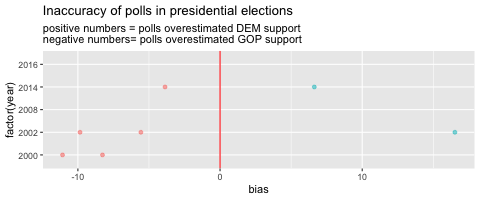

In [104]:
%%R -h 200

df_brown <- df %>% 
    filter(pollster == 'Brown University')

ggplot(df_brown) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

👉 **American Research Group**

In [105]:
df_ARG = df[df['pollster'] == 'American Research Group']
df_ARG

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
315,7384,9127,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,1/27/00,600.0,Al Gore,222,DEM,50.0,Bill Bradley,224,DEM,43.0,NaN,7.0,2/1/00,49.73,45.59,4.14,NaN,1.0,NaN
318,7384,9129,7116,2000,2000_Pres-R_NH,NH,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,1/27/00,600.0,John McCain,14677,REP,36.0,George W. Bush,241,REP,34.0,17.0,2.0,2/1/00,48.53,30.36,18.17,NaN,1.0,NaN
342,7357,9084,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,1/30/00,600.0,Al Gore,222,DEM,50.0,Bill Bradley,224,DEM,45.0,NaN,5.0,2/1/00,49.73,45.59,4.14,NaN,1.0,NaN
346,7357,9087,7116,2000,2000_Pres-R_NH,NH,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,1/30/00,600.0,John McCain,14677,REP,36.0,George W. Bush,241,REP,38.0,16.0,-2.0,2/1/00,48.53,30.36,18.17,NaN,0.0,NaN
357,7345,9062,7120,2000,2000_Pres-R_SC,SC,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,2/3/00,600.0,George W. Bush,241,REP,42.0,John McCain,14677,REP,45.0,3.0,-3.0,2/19/00,53.39,41.87,11.52,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,63413,116434,7694,2020,2020_Pres-D_IA,IA,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,1/29/20,400.0,Bernard Sanders,13257,DEM,23.0,Pete Buttigieg,13345,DEM,9.0,15.0,14.0,2/3/20,24.71,21.31,3.41,NaN,1.0,NaN
9598,63493,116743,7729,2020,2020_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,2/9/20,400.0,Bernard Sanders,13257,DEM,28.0,Pete Buttigieg,13345,DEM,20.0,13.0,8.0,2/11/20,25.60,24.28,1.32,NaN,1.0,NaN
10367,72226,135493,6241,2020,2020_Pres-G_NH,NH,Pres-G,Pres-G,American Research Group,9,Live Phone,NaN,10/27/20,600.0,Joseph R. Biden Jr.,13256,DEM,58.0,Donald Trump,13254,REP,39.0,1.0,19.0,11/3/20,52.71,45.36,7.35,11.65,1.0,NaN
10414,72226,135495,6286,2020,2020_Sen-G_NH,NH,Sen-G,Sen-G,American Research Group,9,Live Phone,NaN,10/27/20,600.0,Jeanne Shaheen,13448,DEM,57.0,Corky Messner,14492,REP,40.0,0.0,17.0,11/3/20,56.64,40.99,15.65,1.35,1.0,NaN


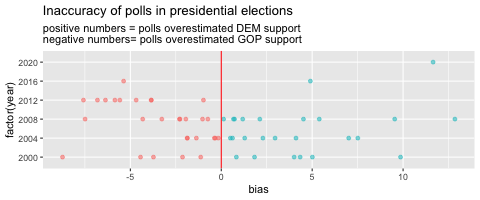

In [106]:
%%R -h 200

df_ARG <- df %>% 
    filter(pollster == 'American Research Group') %>%
    filter(type_detail=='Pres-G')
    

ggplot(df_ARG) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
